In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("first inten project.csv")
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


data preprocessing 

In [3]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(36285, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df["type of meal"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [9]:
df["room type"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [10]:
df["market segment type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [11]:
df["booking status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [12]:
new_df = df.drop("Booking_ID",axis="columns")

In [13]:
for column in new_df.columns:
    print("\nValue counts for :" ,column)
    print(new_df[column].value_counts())


Value counts for : number of adults
number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

Value counts for : number of children
number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

Value counts for : number of weekend nights
number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

Value counts for : number of week nights
number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

Value counts for : type of meal
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

Value counts for : car parking space
car parking space
0  

correlation map for the dataset

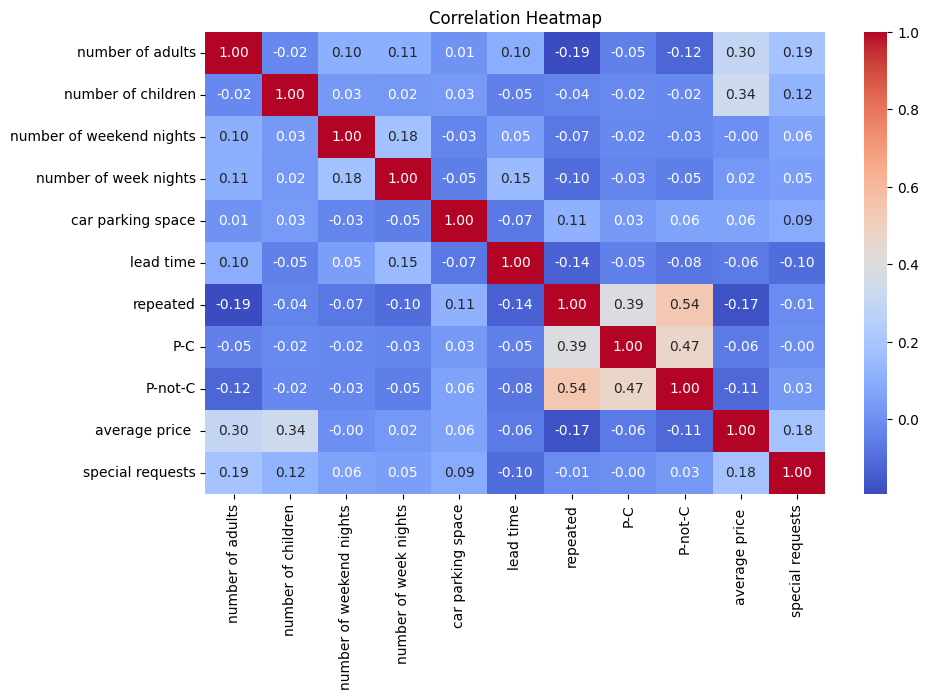

In [14]:
numerical = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


comprision between week nights reservations and weekend nights reservations 

In [15]:
sum_of_nights = [df["number of week nights"].sum(),df["number of weekend nights"].sum()]

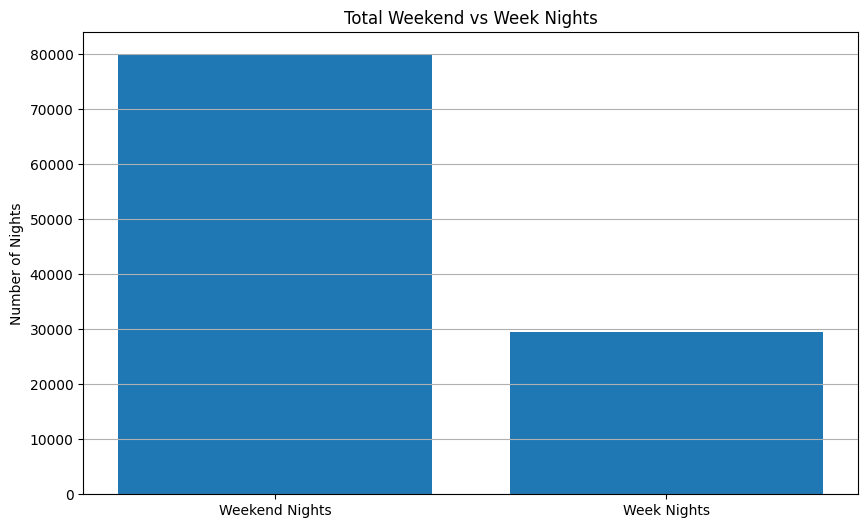

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(['Weekend Nights', 'Week Nights'], sum_of_nights)
plt.title('Total Weekend vs Week Nights')
plt.ylabel('Number of Nights')
plt.grid(True, axis='y')
plt.show()

plotting of bookings according to categroical feautures 

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\3331905934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'number of adults', palette = 'Set2', data = df)


<Axes: title={'center': ' bookings according to adults'}, xlabel='number of adults', ylabel='count'>

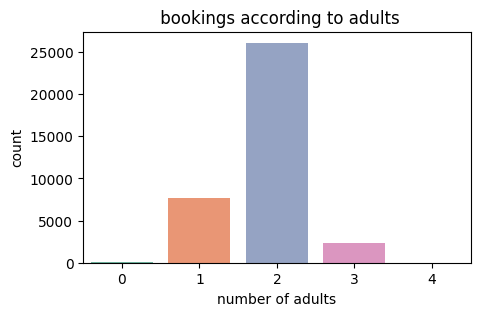

In [17]:

plt.figure(figsize = (5,3))
plt.gca().set_title(' bookings according to adults')
sns.countplot(x = 'number of adults', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\2540640154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'number of children', palette = 'Set3', data = df)


<Axes: title={'center': 'bookings according to number of children'}, xlabel='number of children', ylabel='count'>

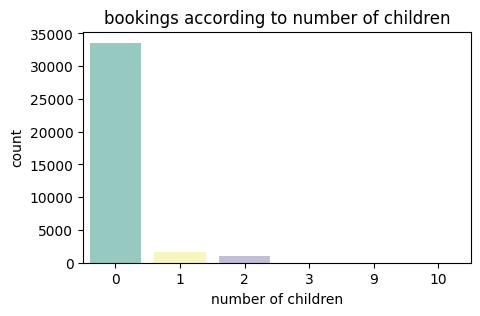

In [18]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to number of children')
sns.countplot(x = 'number of children', palette = 'Set3', data = df)

In [19]:
# df["sum of children"]= df["number of children"].value_counts()

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\3473818230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'type of meal', palette = 'Set1', data = df)


<Axes: title={'center': 'bookings according to type of meal'}, xlabel='type of meal', ylabel='count'>

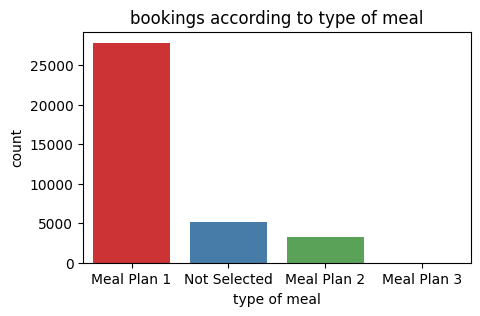

In [20]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to type of meal')
sns.countplot(x = 'type of meal', palette = 'Set1', data = df)


C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\3552801249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'car parking space', palette = 'Set2', data = df)


<Axes: title={'center': 'bookings according to car parking space'}, xlabel='car parking space', ylabel='count'>

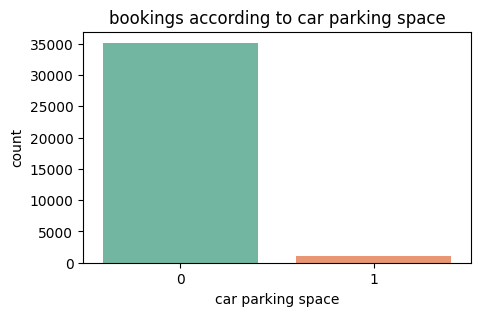

In [21]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to car parking space')
sns.countplot(x = 'car parking space', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\2338365120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'repeated', palette = 'Set1', data = df)


<Axes: title={'center': 'bookings according to repeated bookings'}, xlabel='repeated', ylabel='count'>

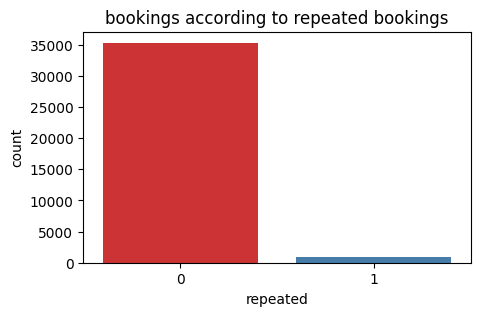

In [22]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to repeated bookings')
sns.countplot(x = 'repeated', palette = 'Set1', data = df)

In [23]:
# plt.figure(figsize = (5,3))
# plt.gca().set_title('bookings according to market segment')
# sns.countplot(x = 'market segment type', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\3122844226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'booking status', palette = 'Set2', data = df)


<Axes: title={'center': 'bookings according to booking status'}, xlabel='booking status', ylabel='count'>

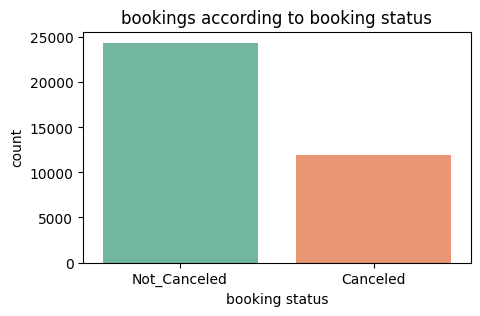

In [24]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to booking status')
sns.countplot(x = 'booking status', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\3129598630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'room type', palette = 'Set2', data = df)


<Axes: title={'center': 'bookings according to room_type'}, xlabel='room type', ylabel='count'>

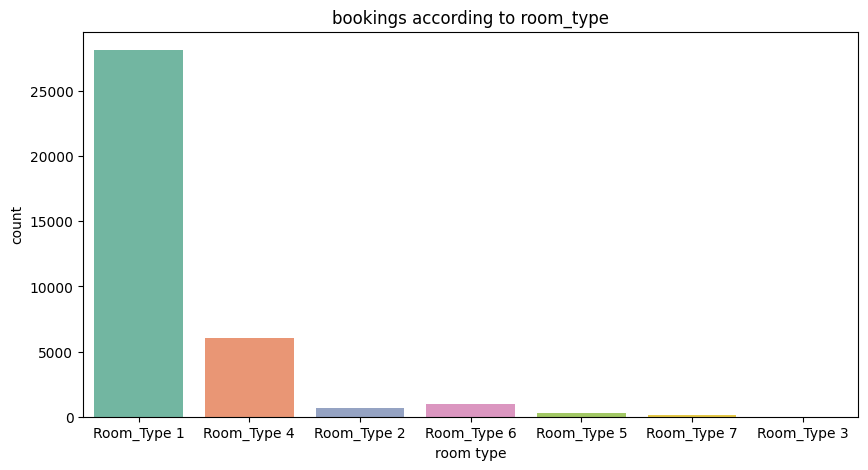

In [25]:
plt.figure(figsize = (10,5))
plt.gca().set_title('bookings according to room_type')
sns.countplot(x = 'room type', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\1591428636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'P-C', palette = 'Set1', data = df)


<Axes: title={'center': 'bookingd according to previous canceled'}, xlabel='P-C', ylabel='count'>

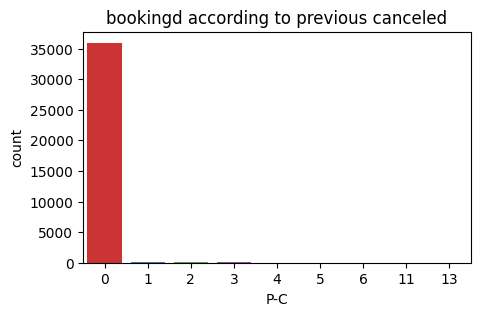

In [26]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookingd according to previous canceled')
sns.countplot(x = 'P-C', palette = 'Set1', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\356909575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'P-not-C', palette = 'Set3', data = df)


<Axes: title={'center': 'bookings according to previous not canceled'}, xlabel='P-not-C', ylabel='count'>

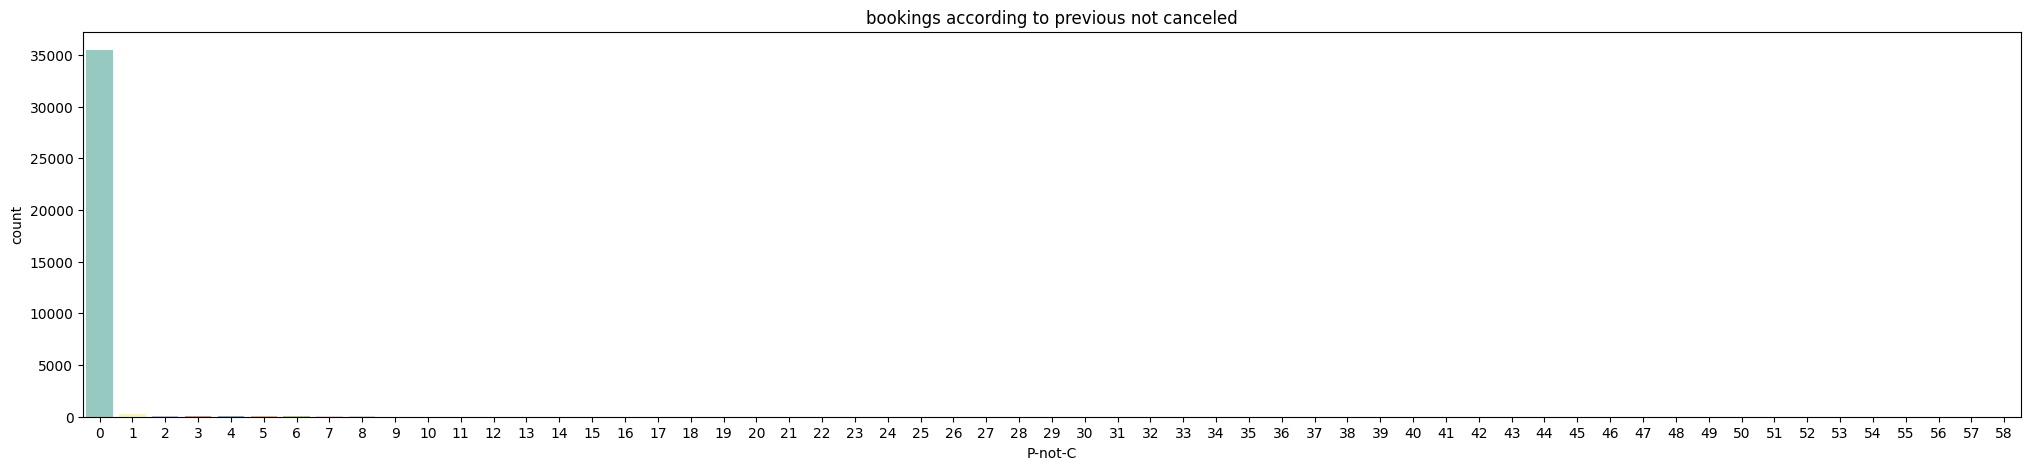

In [27]:
plt.figure(figsize = (25,5))
plt.gca().set_title('bookings according to previous not canceled')
sns.countplot(x = 'P-not-C', palette = 'Set3', data = df)

most market segment type used 

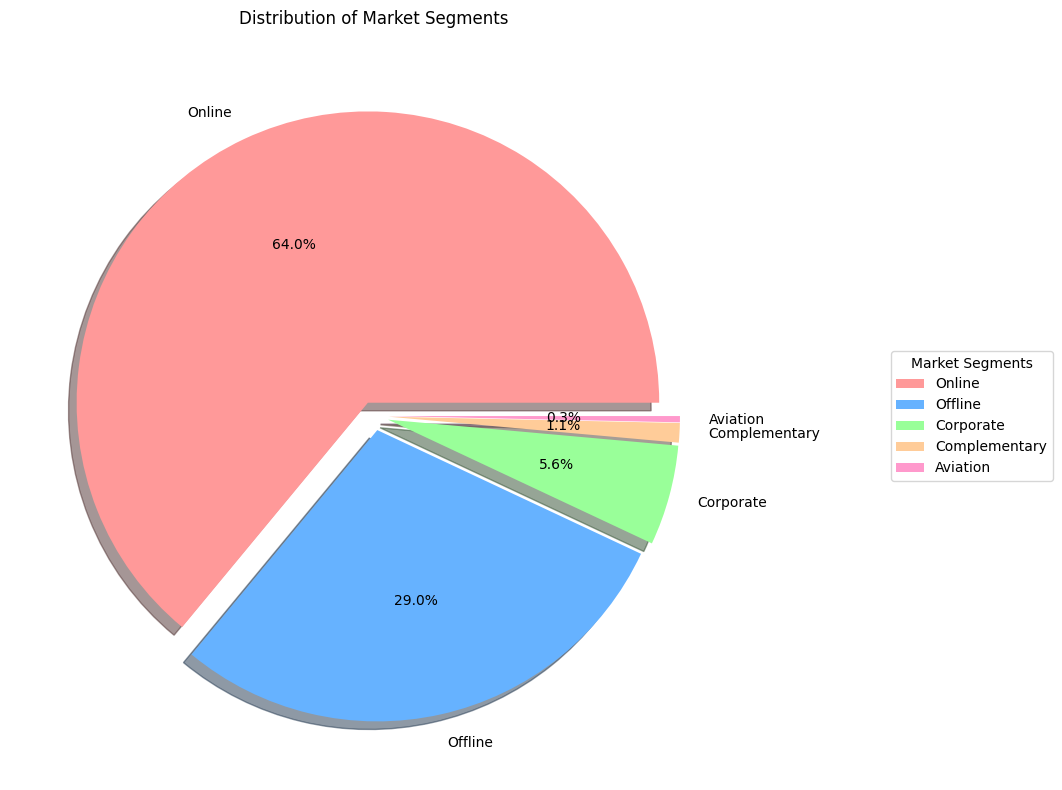

In [28]:
market_segments = df['market segment type'].value_counts()

plt.figure(figsize=(14, 8))
plt.pie(market_segments.values, 
        labels=market_segments.index,
        autopct='%1.1f%%',  
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'], 
        explode=[0.05] * len(market_segments), 
        shadow=True) 

plt.title('Distribution of Market Segments', pad=20)


plt.legend(market_segments.index, 
          title="Market Segments",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.tight_layout()
plt.show()

which day has the most bookings 

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\1142146978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_count.index, y=day_count.values, palette="Reds_r")


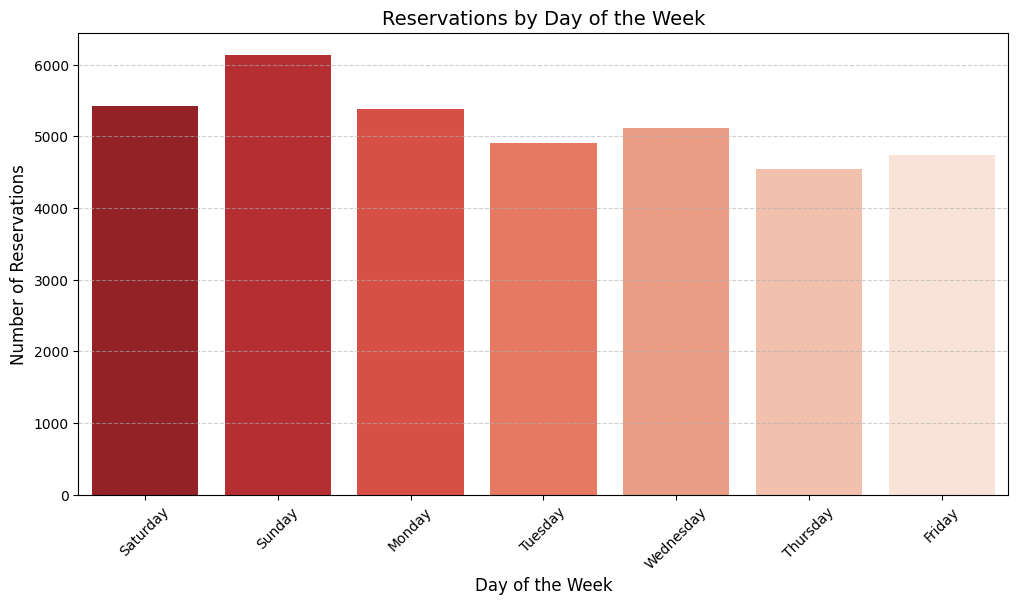

In [29]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
df['days'] = df['date of reservation'].dt.day_name()
day_count = df['days'].value_counts()
day_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
day_count = day_count.reindex(day_order)


plt.figure(figsize=(12, 6))
sns.barplot(x=day_count.index, y=day_count.values, palette="Reds_r")
plt.title("Reservations by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


which month has the most bookings 

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\2981609201.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="Blues_r")


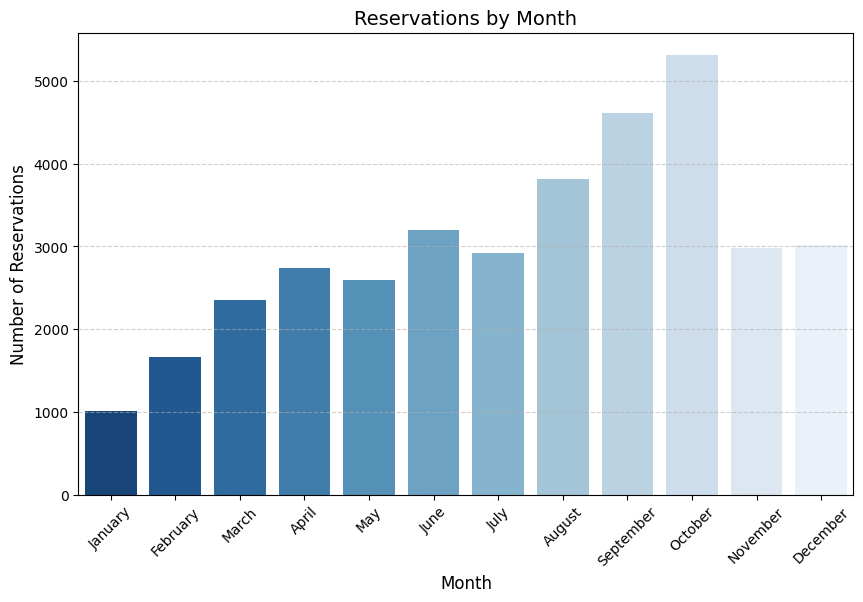

In [30]:
df['months'] = df['date of reservation'].dt.month_name()
month_counts = df['months'].value_counts()
month_order = ["January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December"]
month_counts = month_counts.reindex(month_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="Blues_r")

plt.title("Reservations by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

the month has the highest canceled bookings

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\2938266833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Greens_r")


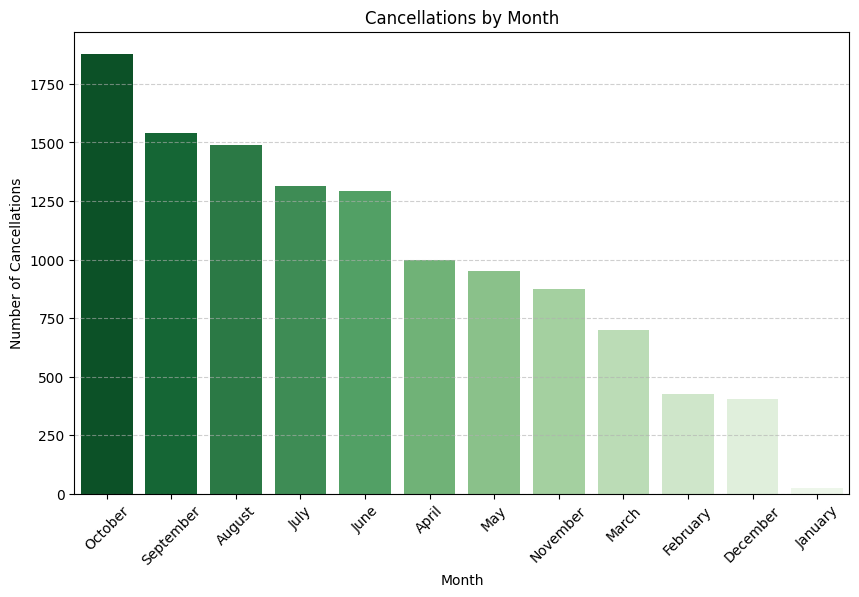

In [31]:
df['month'] = df['date of reservation'].dt.month_name()
cancellation_counts = df[df['booking status'] == 'Canceled']['month'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Greens_r")
plt.title("Cancellations by Month")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


bookings according to lead time 

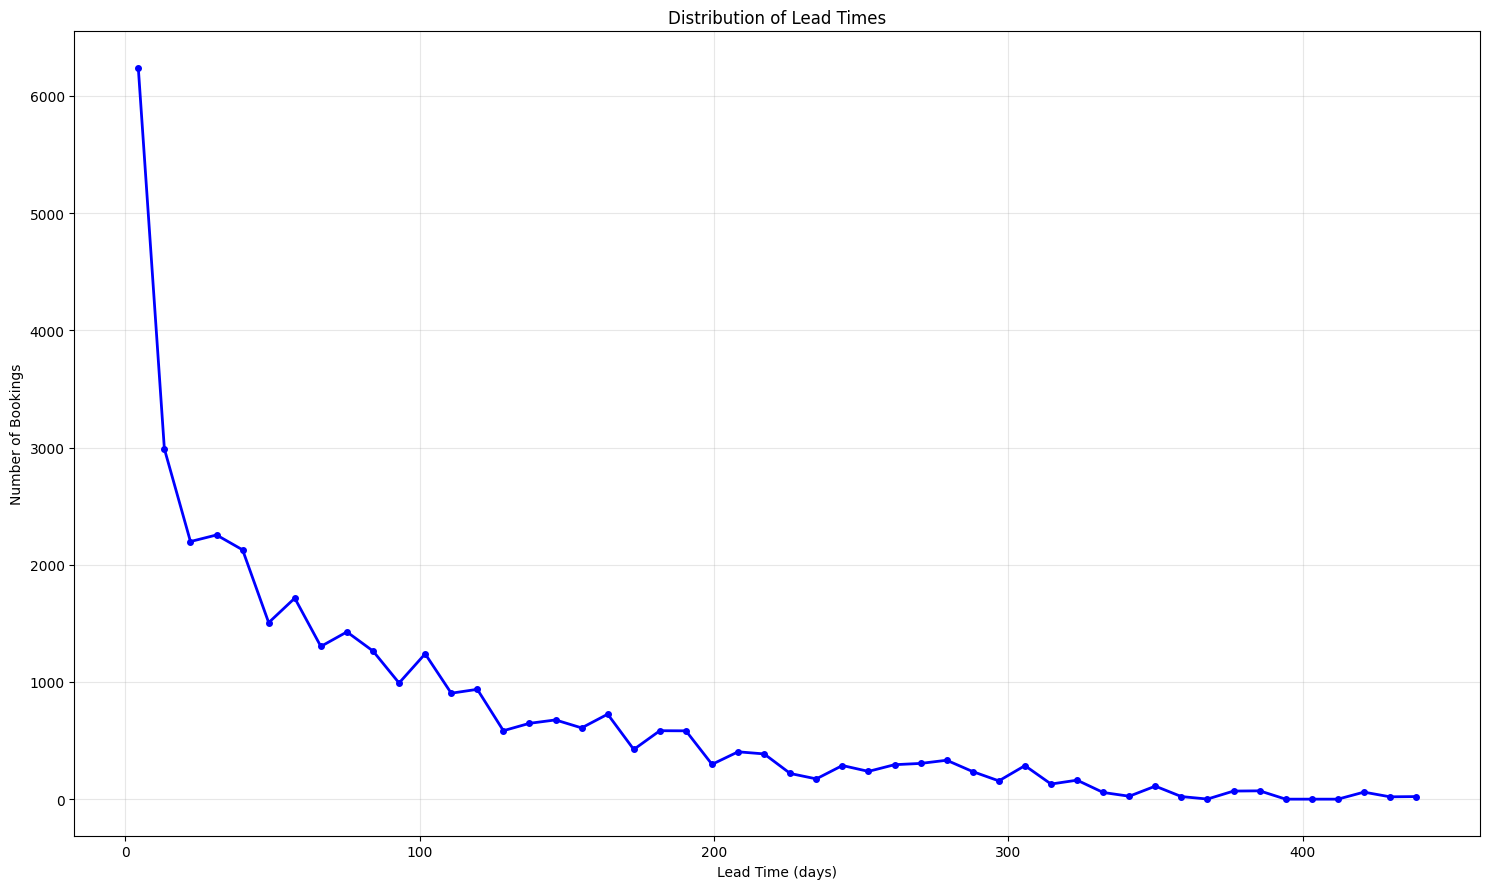

In [32]:
df['lead_time_category'] = pd.cut(df['lead time'], 
                                 bins=[0, 7, 30, 90, 180, float('inf')],
                                 labels=['0-7 days', '8-30 days', '31-90 days', 
                                       '91-180 days', '180+ days'])
plt.figure(figsize=(15, 9))
counts, bins = np.histogram(df['lead time'], bins=50)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, counts, '-', color='blue', linewidth=2)
plt.plot(bin_centers, counts, 'o', color='blue', markersize=4)
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

which lead time has the most booking rate

Text(0, 0.5, 'Number of Bookings')

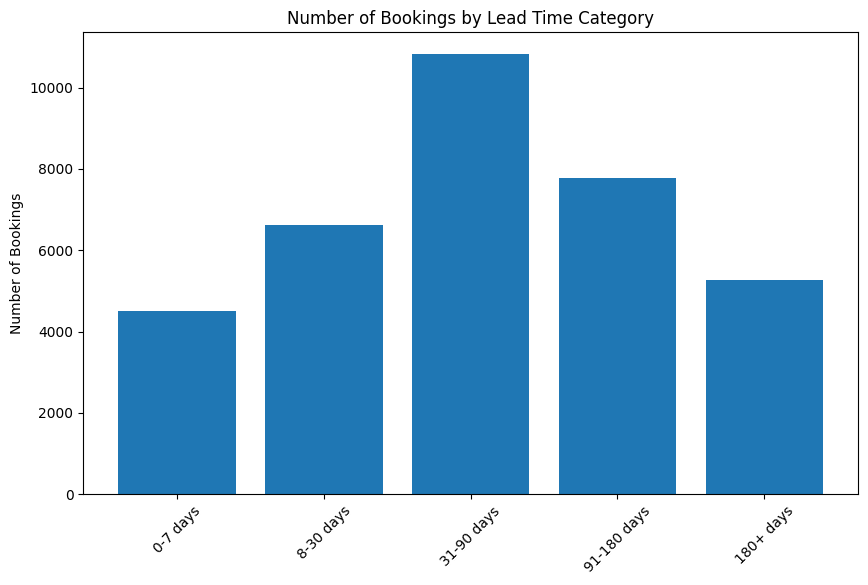

In [33]:
plt.figure(figsize=(10,6))
lead_time_counts = df['lead_time_category'].value_counts().sort_index()
plt.bar(lead_time_counts.index, lead_time_counts.values)
plt.title('Number of Bookings by Lead Time Category')
plt.xticks(rotation=45)
plt.ylabel('Number of Bookings')


which lead time has the most cancellation rate

Text(0, 0.5, 'Number of Cancellations')

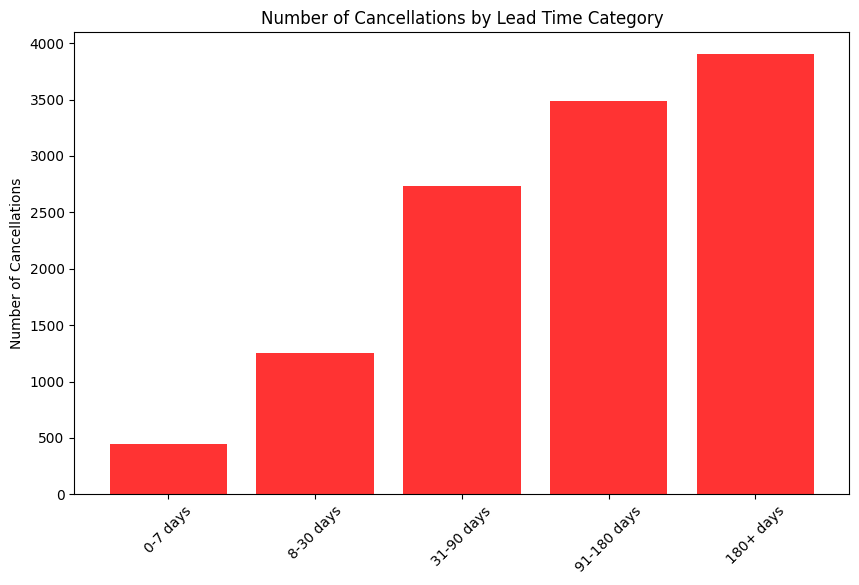

In [34]:
cancellations = df[df['booking status'] == 'Canceled']
cancellation_counts = cancellations['lead_time_category'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(cancellation_counts.index, cancellation_counts.values, color = "#FF3333")
plt.title('Number of Cancellations by Lead Time Category')
plt.xticks(rotation=45)
plt.ylabel('Number of Cancellations')

average price according to room type

In [35]:
room_prices = df.groupby("room type")["average price "].mean().sort_values()

as we see the most average prices is room type 6 

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\3844958703.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= room_prices.index, y=room_prices.values, palette="Reds_r")


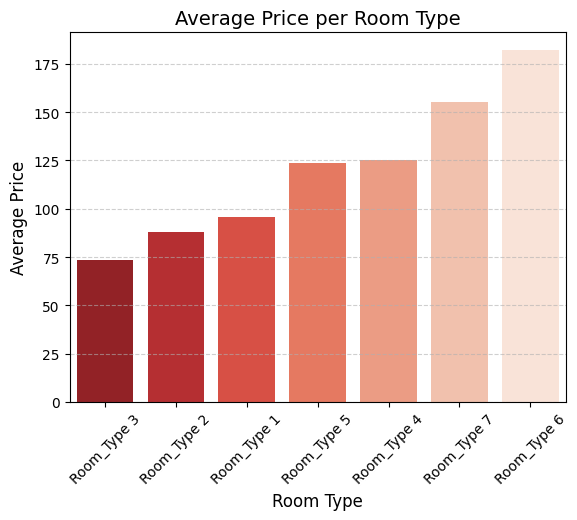

In [36]:
sns.barplot(x= room_prices.index, y=room_prices.values, palette="Reds_r")

plt.title("Average Price per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

average price according to meal 

In [37]:
prices_meal = df.groupby("type of meal")["average price "].mean().sort_values()

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\1339639561.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= prices_meal.index, y=prices_meal.values, palette="Reds_r")


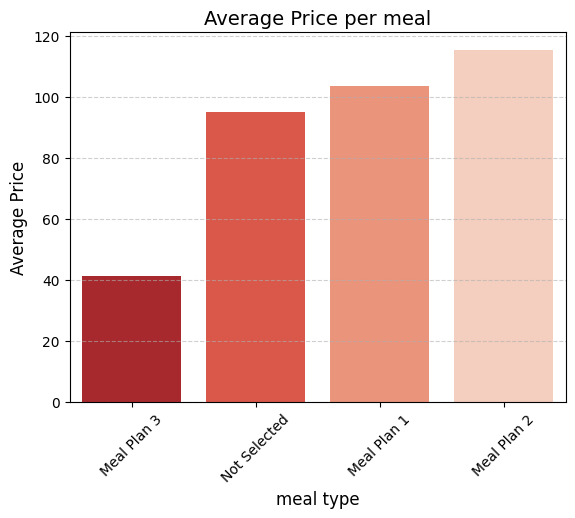

In [38]:
sns.barplot(x= prices_meal.index, y=prices_meal.values, palette="Reds_r")

plt.title("Average Price per meal", fontsize=14)
plt.xlabel("meal type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [39]:
special_request_prices = df.groupby("special requests")["average price "].mean().sort_values()

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\2929527905.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= special_request_prices.index, y=special_request_prices.values, palette="Reds_r")


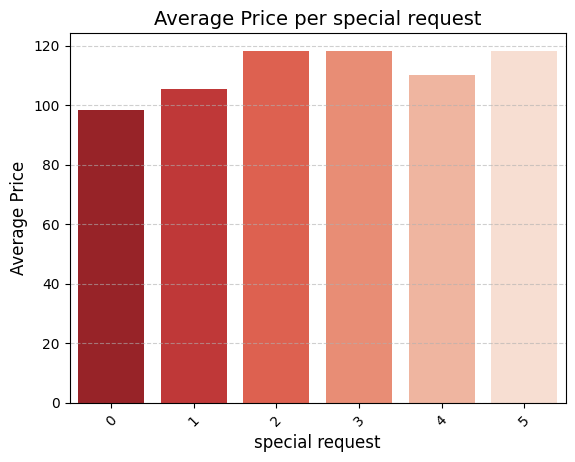

In [40]:
sns.barplot(x= special_request_prices.index, y=special_request_prices.values, palette="Reds_r")

plt.title("Average Price per special request", fontsize=14)
plt.xlabel("special request", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

average price according to market types 

In [41]:
market_price = df.groupby('market segment type')["average price "].mean().sort_values()

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_32160\369401824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= market_price.index, y=market_price.values, palette="Greens_r")


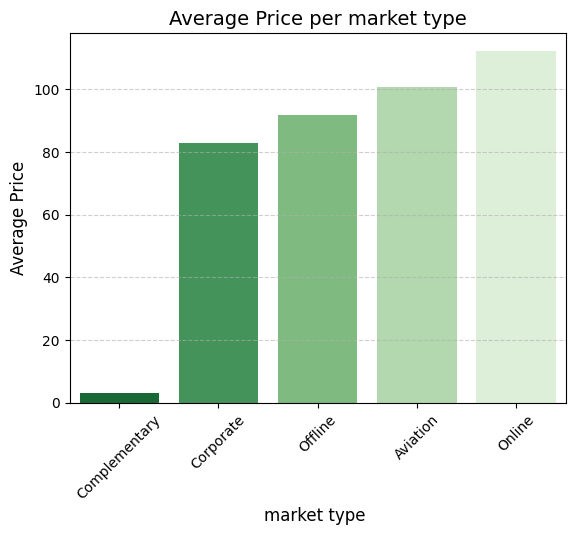

In [42]:
sns.barplot(x= market_price.index, y=market_price.values, palette="Greens_r")

plt.title("Average Price per market type", fontsize=14)
plt.xlabel("market type ", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)


invidual vs family bookings 


In [43]:
df['customer_type'] = 'Individual/Couple'
df.loc[df['number of children'] > 0, 'customer_type'] = 'Family'

Text(0.5, 1.0, 'Distribution of Customer Types')

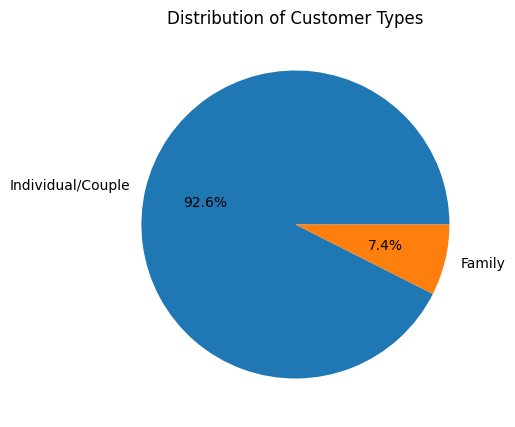

In [44]:
plt.figure(figsize=(15, 5))
customer_dist = df['customer_type'].value_counts()
plt.pie(customer_dist.values, labels=customer_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Customer Types')


most of customers are new or repeated customers


In [45]:
df['customer_visit'] = 'New Customer'
df.loc[df['repeated'] > 0, 'customer_visit'] = 'Repeated Customer'


Text(0.5, 1.0, 'Distribution of Customer Types')

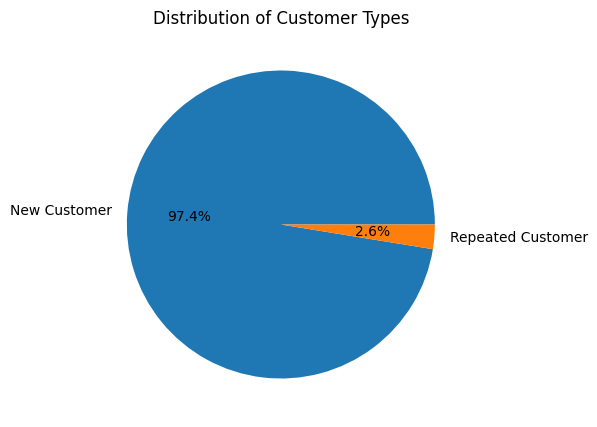

In [46]:
plt.figure(figsize=(15, 5))
customer_type = df['customer_visit'].value_counts()
plt.pie(customer_type.values, labels=customer_type.index, autopct='%1.1f%%')
plt.title('Distribution of Customer Types')


special requests according to room type 

In [47]:
room_special_requests = df.groupby("room type")["special requests"].mean()

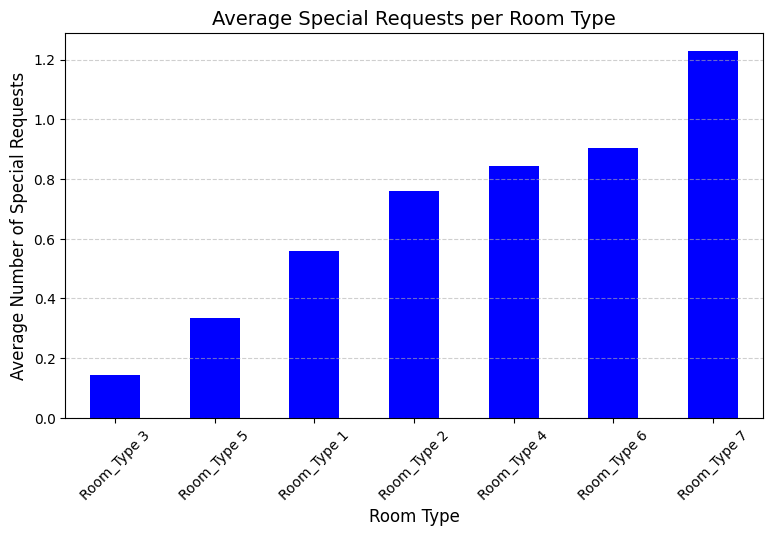

In [48]:
plt.figure(figsize=(9, 5))
room_special_requests.sort_values().plot(kind="bar", color="Blue")

plt.title("Average Special Requests per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Number of Special Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


average price according to number of adults

In [49]:
adults_price = df.groupby("number of adults")["average price "].mean().sort_values()

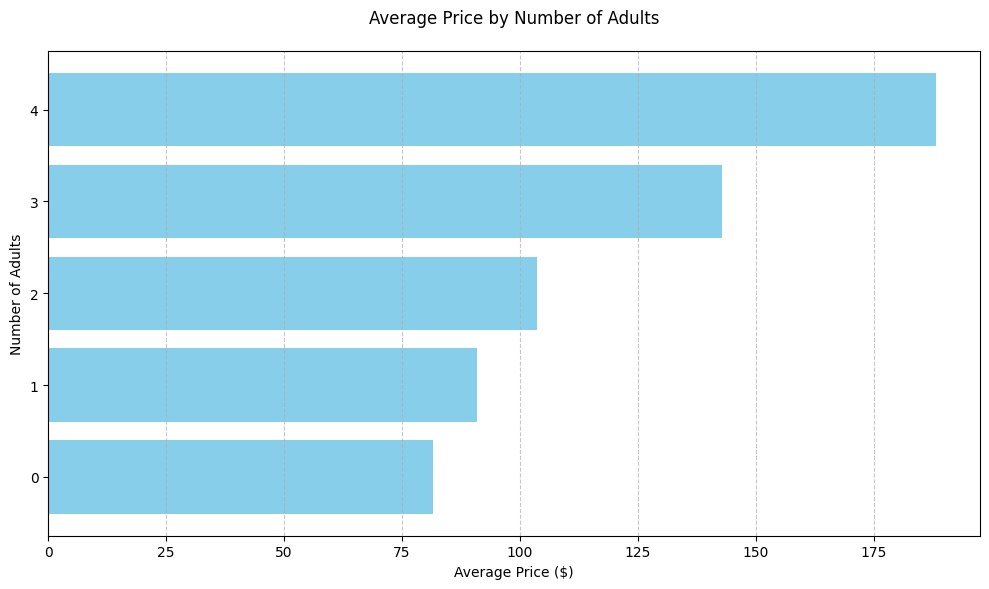

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(y=adults_price.index, width=adults_price.values, color='skyblue')
plt.title('Average Price by Number of Adults', pad=20)
plt.xlabel('Average Price ($)')
plt.ylabel('Number of Adults')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

average price according to number of children (family prices)

In [51]:
family_price = df.groupby("number of children")["average price "].mean().sort_values()

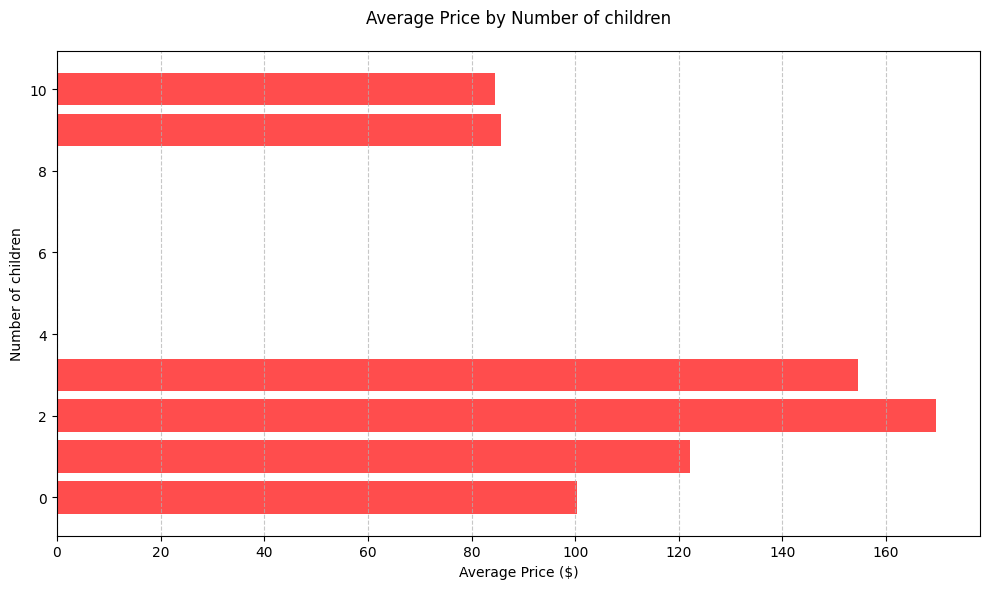

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(y=family_price.index, width=family_price.values, color='#FF4D4D')
plt.title('Average Price by Number of children', pad=20)
plt.xlabel('Average Price ($)')
plt.ylabel('Number of children')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

adults only prices vs family prices 

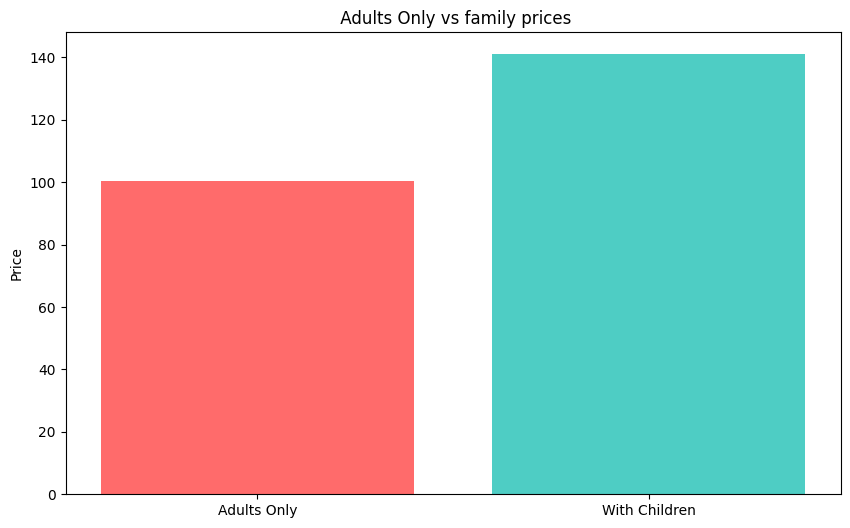

In [53]:
df['booking_type'] = 'Adults Only'
df.loc[df['number of children'] > 0, 'booking_type'] = 'With Children'
avg_prices = df.groupby('booking_type')['average price '].mean().round(2)
plt.figure(figsize=(10, 6))
plt.bar(avg_prices.index, avg_prices.values, color=['#FF6B6B', '#4ECDC4'])
plt.title(' Adults Only vs family prices')
plt.ylabel('Price')

plt.show()



does car parking availability affect cancellation 

In [54]:
car_parking_cancellation = df.groupby("car parking space")["P-C"].mean()

Text(0, 0.5, 'Average Cancellations')

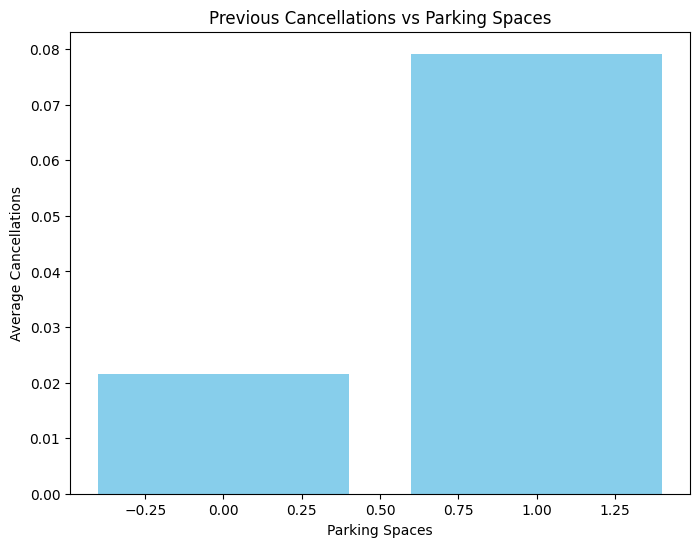

In [55]:
plt.figure(figsize=(8, 6))
plt.bar(car_parking_cancellation.index, car_parking_cancellation.values, color='skyblue')

plt.title('Previous Cancellations vs Parking Spaces')
plt.xlabel('Parking Spaces')
plt.ylabel('Average Cancellations')

previous cancellations according to the market segment way 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Offline'),
  Text(4, 0, 'Online')])

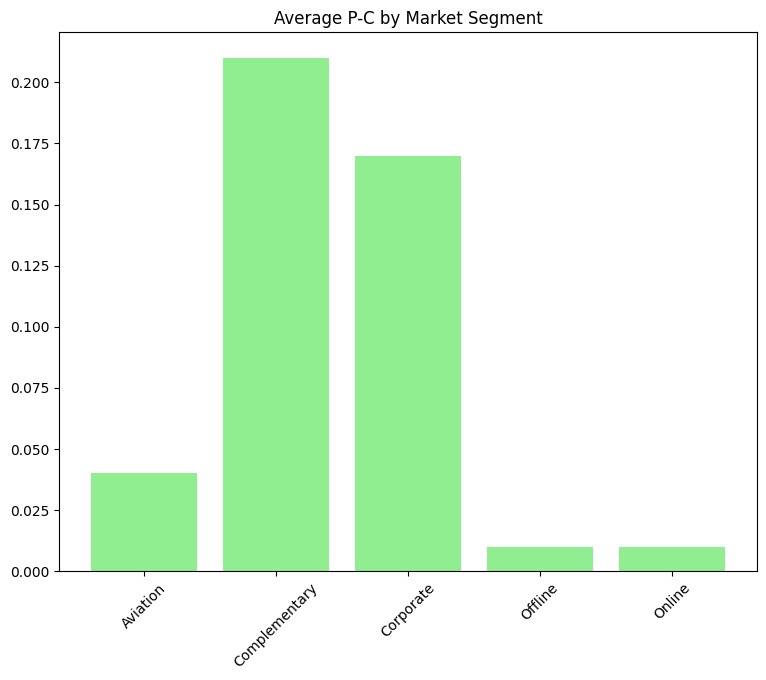

In [56]:
plt.figure(figsize=(9, 7))
market_pc = df.groupby('market segment type')['P-C'].mean().round(2)
plt.bar(market_pc.index, market_pc.values, color='lightgreen')
plt.title('Average P-C by Market Segment')
plt.xticks(rotation=45)


previous cancellations impact according to average price

Text(0, 0.5, 'Average Price')

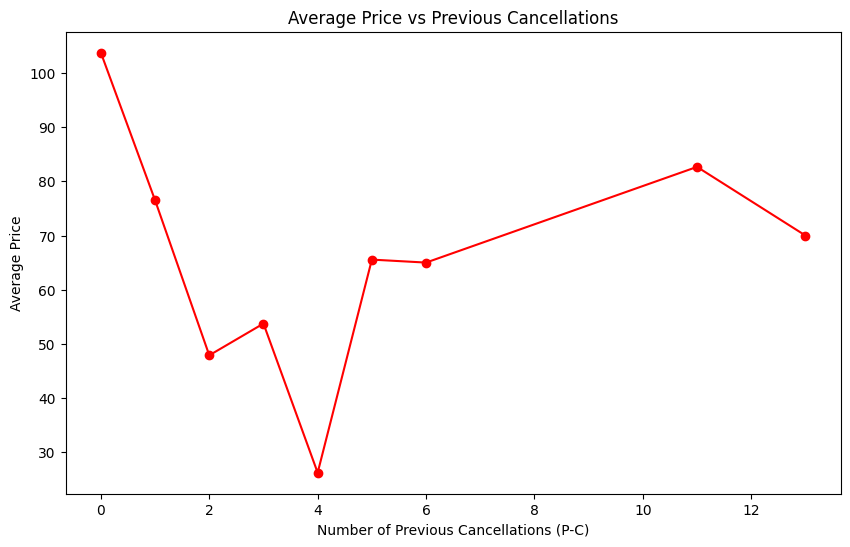

In [57]:
pc_prices = df.groupby('P-C')['average price '].mean().round(2)
plt.figure(figsize=(10, 6))
plt.plot(pc_prices.index, pc_prices.values, marker='o', color='red')
plt.title('Average Price vs Previous Cancellations')
plt.xlabel('Number of Previous Cancellations (P-C)')
plt.ylabel('Average Price')